In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('bank_data.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [ ]:
CAT_TO_NUM = ['month','y']
CAT_COLUMNS = [col for col in df.columns if df[col].dtype == 'object' and col not in CAT_TO_NUM]
NUM_COLUMNS = [col for col in df.columns if df[col].dtype=='int64']
CAT_COLUMNS

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [ ]:
df_cat = pd.get_dummies(df[CAT_COLUMNS])
df_cat.info()
df_cat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_admin.           4521 non-null   uint8
 1   job_blue-collar      4521 non-null   uint8
 2   job_entrepreneur     4521 non-null   uint8
 3   job_housemaid        4521 non-null   uint8
 4   job_management       4521 non-null   uint8
 5   job_retired          4521 non-null   uint8
 6   job_self-employed    4521 non-null   uint8
 7   job_services         4521 non-null   uint8
 8   job_student          4521 non-null   uint8
 9   job_technician       4521 non-null   uint8
 10  job_unemployed       4521 non-null   uint8
 11  job_unknown          4521 non-null   uint8
 12  marital_divorced     4521 non-null   uint8
 13  marital_married      4521 non-null   uint8
 14  marital_single       4521 non-null   uint8
 15  education_primary    4521 non-null   uint8
 16  education_secondary  452

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [ ]:
df.month.unique

<bound method Series.unique of 0       oct
1       may
2       apr
3       jun
4       may
       ... 
4516    jul
4517    may
4518    aug
4519    feb
4520    apr
Name: month, Length: 4521, dtype: object>

In [ ]:
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct': 10,
              'nov':11, 'dec':12}
df['month_num'] = df.month.apply(lambda x:month_dict[x])
df.month_num

0       10
1        5
2        4
3        6
4        5
        ..
4516     7
4517     5
4518     8
4519     2
4520     4
Name: month_num, Length: 4521, dtype: int64

In [ ]:
df['target'] = df.y.apply(lambda x:1 if x=='yes' else 0)
df.target.value_counts()

0    4000
1     521
Name: target, dtype: int64

In [ ]:
df_data = pd.concat([df_cat, df[NUM_COLUMNS],df.month_num, df.target],axis=1).drop(['Unnamed: 0'],axis=1)
df_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,month_num,target
0,0,0,0,0,0,0,0,0,0,0,...,1,30,1787,19,79,1,-1,0,10,0
1,0,0,0,0,0,0,0,1,0,0,...,0,33,4789,11,220,1,339,4,5,0
2,0,0,0,0,1,0,0,0,0,0,...,0,35,1350,16,185,1,330,1,4,0
3,0,0,0,0,1,0,0,0,0,0,...,1,30,1476,3,199,4,-1,0,6,0
4,0,1,0,0,0,0,0,0,0,0,...,1,59,0,5,226,1,-1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,1,33,-333,30,329,5,-1,0,7,0
4517,0,0,0,0,0,0,1,0,0,0,...,1,57,-3313,9,153,1,-1,0,5,0
4518,0,0,0,0,0,0,0,0,0,1,...,1,57,295,19,151,11,-1,0,8,0
4519,0,1,0,0,0,0,0,0,0,0,...,0,28,1137,6,129,4,211,3,2,0


In [ ]:
corr = df_data.corr()
corr.target.sort_values(ascending=False)

target                 1.000000
duration               0.401118
poutcome_success       0.283481
contact_cellular       0.118761
previous               0.116714
housing_no             0.104683
pdays                  0.104087
job_retired            0.086675
loan_no                0.070517
education_tertiary     0.056649
poutcome_other         0.051908
job_student            0.047809
marital_single         0.045815
age                    0.045092
marital_divorced       0.034840
job_management         0.032634
contact_telephone      0.025878
month_num              0.023335
job_unknown            0.019886
balance                0.017905
poutcome_failure       0.014556
job_admin.             0.006568
job_housemaid          0.004872
default_yes            0.001303
default_no            -0.001303
job_self-employed     -0.003827
job_unemployed        -0.007312
education_unknown     -0.008870
job_technician        -0.010154
day                   -0.011244
job_entrepreneur      -0.015968
job_serv

<Axes: >

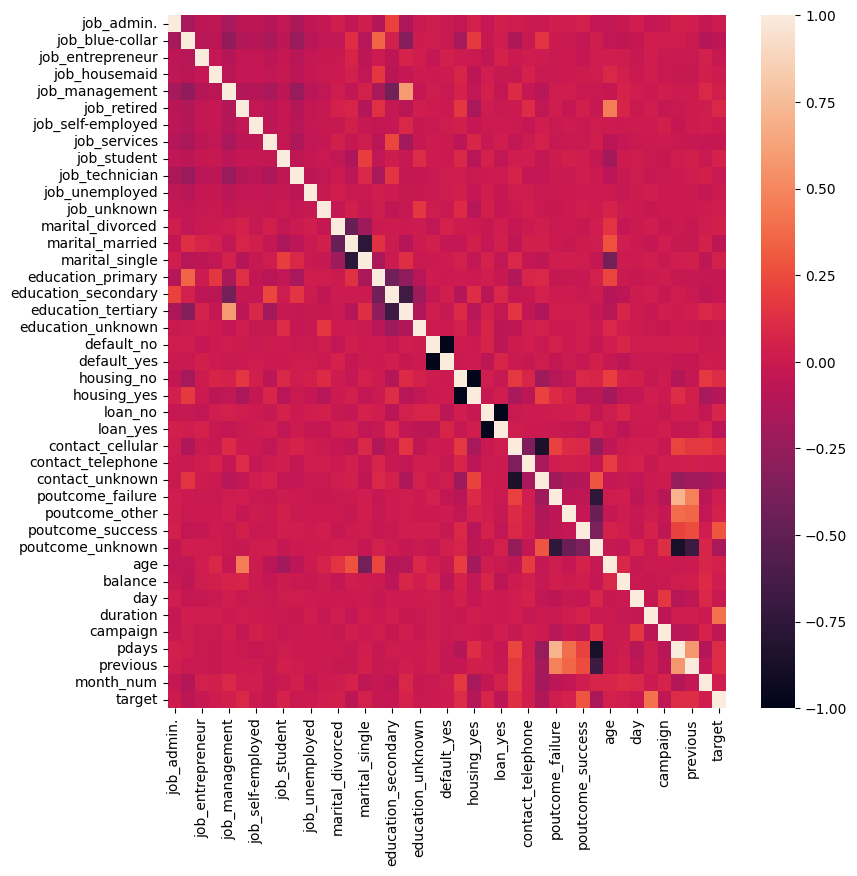

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_data.drop(['target'],axis=1),df_data.target,test_size=0.2, random_state=41)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((3616, 40), (905, 40), (3616,), (905,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
y_pred = rf.predict(Xtest)
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_pred, Ytest)

0.8773480662983425

<Axes: >

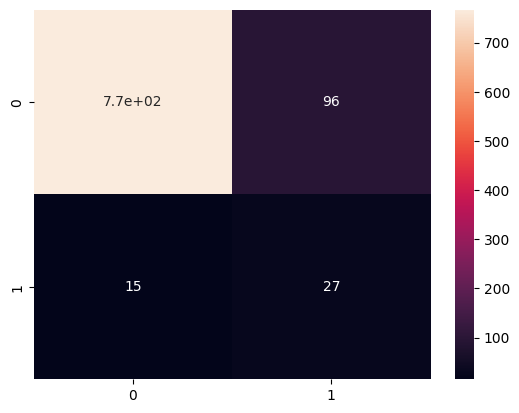

In [ ]:
sns.heatmap(confusion_matrix(y_pred, Ytest),annot=True)

In [ ]:
#standard scaler
X = df_data.drop(['target'],axis=1)
Y = df_data.target
X = (X-X.mean()) / X.std()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=41)
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((3616, 40), (3616,), (905, 40), (905,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
y_pred = rf.predict(Xtest)
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_pred, Ytest)

0.8806629834254144

In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_dataset = MyDataset(Xtrain, Ytrain)
test_dataset = MyDataset(Xtest, Ytest)
train_loader = DataLoader(train_dataset, batch_size=600, shuffle=True)
test_loader = DataLoader(test_dataset)

In [ ]:
pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.9.1+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.

In [ ]:
pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cuXXX/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cuXXX/torch_stable.html


In [ ]:
pip install nn

  Preparing metadata (setup.py) ... done
  Created wheel for nn: filename=nn-0.1.1-py3-none-any.whl size=5707 sha256=9312ff9163badd3f8ad807812c3070759eb9cbc3d73bc1a90521f988da26317a
  Stored in directory: /root/.cache/pip/wheels/60/62/98/7126b3684829be2701b0f07444922e84b3304646574a159431
Successfully built nn


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class MyNet(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MyNet, self).__init__()  # Corrected the usage of super
        self.layer1 = nn.Linear(in_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, out_dim)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)  # No need for sigmoid here
        return x

# Assuming Xtrain.shape[1] is the input dimension
model = MyNet(Xtrain.shape[1], 1)  # Assuming binary classification (out_dim=1)
criterion = torch.nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(device)

for epoch in range(1000):
    batch_loss = 0
    batch_acc = 0
    batch_cnt = 0
    for X_batch, Y_batch in train_loader:  # Corrected variable name
        X_batch = X_batch.to(device).to(torch.float32)
        Y_batch = Y_batch.to(device).to(torch.float32)
        optimizer.zero_grad()  # Corrected method
        outputs = model(X_batch)
        print(outputs.shape, Y_batch.shape)
        loss = criterion(outputs, Y_batch)  # No need for squeeze(-1) with BCEWithLogitsLoss
        batch_loss += loss.item()
        predictions = torch.round(torch.sigmoid(outputs))  # Use sigmoid for binary classification
        batch_acc += torch.sum(predictions == Y_batch).item() / len(Y_batch)
        batch_cnt += 1

    if epoch % 100 == 0 and epoch > 0:
        print(f'epoch: {epoch} | Train loss: {batch_loss:.2f} | Train acc: {batch_acc / batch_cnt:.2f}')


Streaming output truncated to the last 5000 lines.
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([600, 1]) torch.Size([600, 1])
torch.Size([16, 1]) torch.Size(